<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([5.71534675, 8.40833543, 4.48035472, 1.43154447, 4.63885696,
       7.04699824, 4.88499915, 8.1114696 , 4.25878302, 7.65622141])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

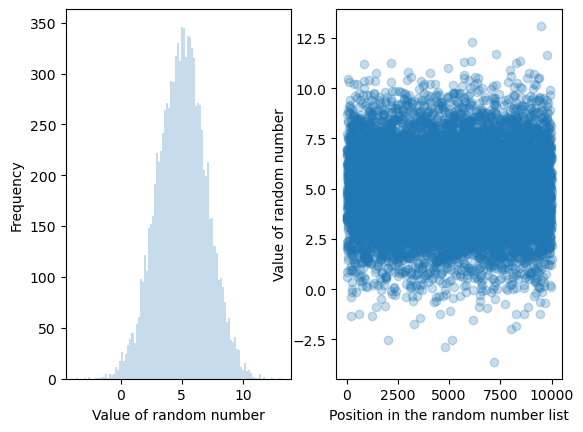

In [3]:
n = 10_000
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [8]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size = n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)
print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.94%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [2]:
import numpy.random as rnd
from matplotlib import pyplot as plt

In [5]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    step_size=1
    x=0
    
    for i in range(no_of_steps):
        if rnd.random() < prob_right:
            x += step_size
        else:
            x -= step_size
    
    return x

brown_1d()

138

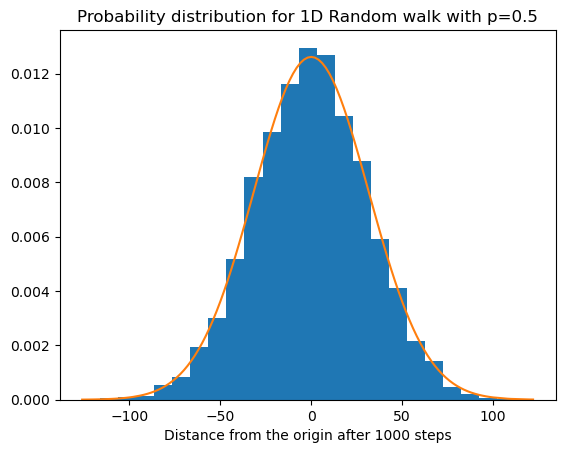

In [30]:
no_of_steps, prob_right = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    s2 = s**2                          # s2 is the variance
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - prob_right                      # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

### 1.3 What does theory say?

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [31]:
N_total = 100_000
N_green = 0

for i in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)     # Distance from the origin
    
    if r <= 1:         # in or out of the circle
        N_green += 1 

4 * N_green / N_total

3.1414

### 2.3 A better solution

In [33]:
N_total = 100_000

x = rnd.uniform(low=-1, high=1, size=N_total)
y = rnd.uniform(low=-1, high=1, size=N_total)
N_green = np.sum((x**2 + y**2 <= 1))

4 * (N_green / N_total)

3.14464

### 2.4 A smarter solution

In [34]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.139164

## Exercise 1 :  Vital Stats of Random π

In [43]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    pi = 4 * (N_green / n)
    return pi
    
no_of_repeats = 100
result = [estimate_pi(n=10000) for i in range(no_of_repeats)]
mean = np.mean(result)
std_dev = np.std(result)
print('Mean:', mean, 'Standard deviation:', std_dev)

Mean: 3.143056 Standard deviation: 0.015545599505969523


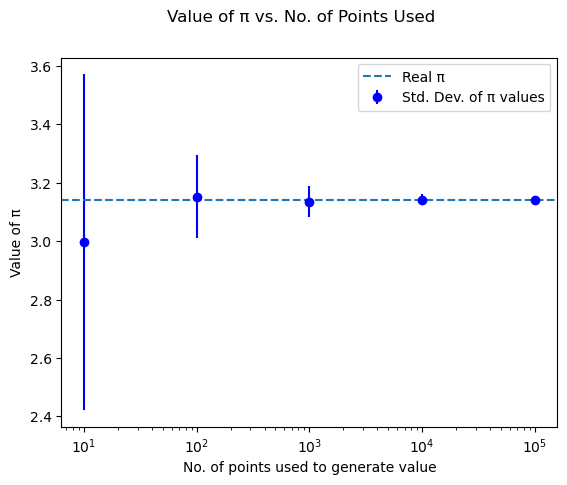

In [33]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    pi = 4 * (N_green / n)
    return pi

means, std_devs = [], []
no_of_points = [10, 100, 1000, 10000, 100000]

for i in no_of_points:
    no_of_repeats = 100
    result = [estimate_pi(n=i) for _ in range(no_of_repeats)]
    mean = np.mean(result)
    std_dev = np.std(result)
    means.append(mean)
    std_devs.append(std_dev)

real_pi = np.pi
    
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xscale('log')
ax.errorbar(no_of_points, means, yerr=std_devs, color='b', marker='o', linestyle='none', label = 'Std. Dev. of π values')
ax.axhline(y = real_pi, label = 'Real π', linestyle = 'dashed')
ax.legend(loc='upper right')
ax.set_xlabel('No. of points used to generate value')
ax.set_ylabel('Value of π')
fig.suptitle('Value of π vs. No. of Points Used')
plt.show()